In [2]:
#System imports
import math, time

import matplotlib.pyplot as plt

import glob

#Helper imports
import numpy as np
import cv2

#Nice printout imports
from termcolor import colored

#TensorFlow
import tensorflow as tf
import keras
from keras import layers, regularizers

#Kaggle
import kagglehub

#Sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle

#Pandas
import pandas as pd

params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.set_visible_devices([], 'GPU')

############################################################################
############################################################################
def plotHistory(model, history):
    
    fig, axes = plt.subplots(1,3, figsize=(15,5), layout='tight')
    
    axes[0].plot(history.history['loss'], label = 'train')
    axes[0].plot(history.history['val_loss'], label = 'val')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss function')
    axes[0].legend(loc='upper right')
    
    axes[1].plot(history.history['loss'], label = 'train')
    axes[1].plot(history.history['val_loss'], label = 'val')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss function')
    axes[1].legend(loc='upper right')
    axes[1].set_yscale('log')

    ConfusionMatrixDisplay.from_predictions(labels, np.argmax(model.predict(features), axis=1), normalize="true", ax=axes[2], colorbar=False) 
############################################################################
############################################################################    

Num GPUs Available:  0


In [3]:
files = glob.glob('/home/akalinow/scratch/RPi/FaceFollow/df.parquet_Wojtek_*.gzip')

df = None

for file in files:
    df_tmp = pd.read_parquet(file)
    df_tmp.drop(index=0, inplace=True)
    df = pd.concat((df, df_tmp))
df.to_parquet('df.parquet_Wojtek.gzip',compression='gzip') 

import glob
files = glob.glob('/home/akalinow/scratch/RPi/FaceFollow/df.parquet_Artur_*.gzip')

df = None

for file in files:
    df_tmp = pd.read_parquet(file)
    df_tmp.drop(index=0, inplace=True)
    df = pd.concat((df, df_tmp))
df.to_parquet('df.parquet_Artur.gzip',compression='gzip') 
df.describe()

,date,label,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_1270,feature_1271,feature_1272,feature_1273,feature_1274,feature_1275,feature_1276,feature_1277,feature_1278,feature_1279
count,8000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,2025-04-10 03:04:58.640486912,-3.751421,-0.284905,0.011144,-0.256952,-0.279415,-0.039030,-0.239193,-0.166623,0.435521,...,-0.086855,0.618976,-0.116844,-0.166323,0.122409,-0.141782,0.156527,0.204096,0.102564,-0.330426
min,2025-04-01 12:36:13.555427,-8.493450,-0.375000,-0.375000,-0.375000,-0.375000,-0.375000,-0.375000,-0.375000,-0.375000,...,-0.375000,-0.374486,-0.375000,-0.374999,-0.375000,-0.375000,-0.375000,-0.375000,-0.374995,-0.375000
25%,2025-04-01 12:57:13.984388352,-6.841044,-0.359071,-0.140799,-0.359123,-0.370273,-0.257238,-0.356267,-0.337494,0.033805,...,-0.301823,0.322235,-0.319818,-0.294957,-0.150207,-0.285149,-0.031857,-0.334793,-0.087863,-0.367475
50%,2025-04-01 13:24:20.377043456,-5.919234,-0.320417,0.000951,-0.316840,-0.353637,-0.116762,-0.310037,-0.241678,0.430045,...,-0.224877,0.570297,-0.178450,-0.187829,0.151317,-0.190363,0.131134,-0.151260,0.078146,-0.349754
75%,2025-04-19 15:21:04.555744512,0.000000,-0.256968,0.151989,-0.188187,-0.284260,0.098614,-0.199484,-0.072130,0.813188,...,-0.062054,0.861250,0.000000,0.000000,0.345467,-0.023247,0.288333,0.597919,0.262529,-0.317013
max,2025-05-04 17:26:38.019604,9.070258,1.824294,1.606076,0.659764,1.694022,1.287135,1.774014,1.879233,2.000997,...,2.033676,3.642326,0.984098,0.096012,1.978871,0.764242,2.770506,3.990021,2.243685,0.324673
std,NaN,3.895003,0.132424,0.215350,0.130910,0.191371,0.292197,0.185842,0.228254,0.486371,...,0.354476,0.509253,0.241276,0.140343,0.327482,0.181262,0.279354,0.696075,0.274667,0.058561


In [4]:
file_path = 'df.parquet_Wojtek.gzip'
df_W = pd.read_parquet(file_path)

file_path = 'df.parquet_Artur.gzip'
df_A = pd.read_parquet(file_path)

file_path = '/home/akalinow/scratch/RPi/FaceFollow/df.parquet_Monika.gzip'
df_test = pd.read_parquet(file_path)

features_W = np.asarray(df_W.drop(columns=['date','label']))
features_A = np.asarray(df_A.drop(columns=['date','label']))
features_test = np.asarray(df_test.drop(columns=['date','label']))

labels_A = np.full((len(features_A),1), 0.0)
labels_W = np.full((len(features_W),1), 1.0)
labels_M = np.full((len(features_test),1), 2.0)
labels_test = np.full((len(features_test),1), 3.0)


#weighted images are away from original images
scale = 0.8
offset = (1 - scale)/2

weights = np.random.default_rng().random(features_A.shape)*scale + offset

features_X = (weights*features_A + (1-weights)*features_W[:len(features_A)])
labels_X = np.full((len(features_X),1), 2.0)

labels = np.concatenate( (labels_A, labels_W, labels_X) )
features = np.concatenate( (features_A, features_W, features_X) )

features, labels = shuffle(features, labels, random_state=0)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization) │ (None, 1280)           │         2,561 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise_3                │ (None, 1280)           │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │        40,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,820 (182.89 KB)

 Trainable params: 44,259 (172.89 KB)

 Non-trainable params: 2,561 (10.01 KB)

891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0112 - sparse_categorical_accuracy: 1.0000 
CPU times: user 5min 15s, sys: 12.2 s, total: 5min 27s
Wall time: 3min 6s


[0.011644603684544563, 0.999824583530426]

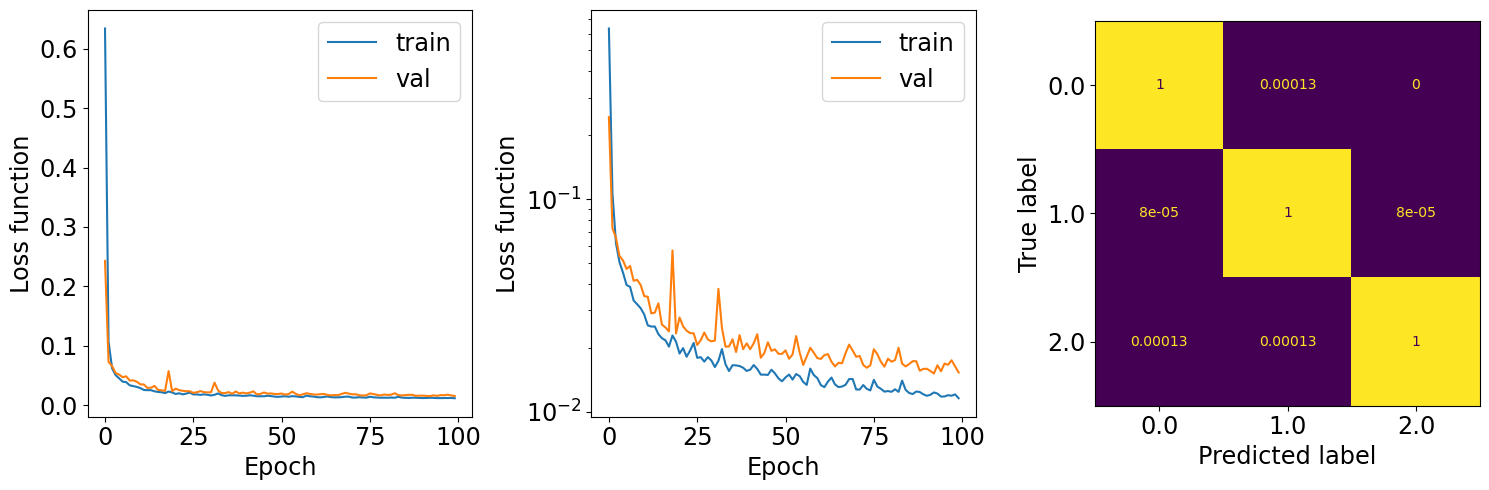

In [9]:
%%time

model = keras.Sequential(
    [
        layers.Input(shape=(features.shape[1],)),
        tf.keras.layers.Normalization(axis=-1),
        tf.keras.layers.GaussianNoise(stddev=0.02),
        layers.Dense(32, activation="sigmoid", kernel_regularizer=regularizers.L2(0.0001)),
        layers.Dense(32, activation="sigmoid", kernel_regularizer=regularizers.L2(0.0001)),
        layers.Dense(32, activation="sigmoid", kernel_regularizer=regularizers.L2(0.0001)),
        layers.Dense(32, activation="sigmoid", kernel_regularizer=regularizers.L2(0.0001)),
        layers.Dense(3, activation="softmax", kernel_regularizer=None),
    ]
)

batch_size = 64
decay_steps = 5*len(labels)/batch_size
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=decay_steps,
    decay_rate=0.95,
    staircase=True)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule), 
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)
model.summary()

history = model.fit(
    features,
    labels,
    batch_size=batch_size,
    epochs=100,
    shuffle=True,
    validation_split = 0.1,
    #class_weight = {0:1.0,1:1.0,2:1.0},
    verbose=0
)

plotHistory(model, history)

model.save(filepath="./model_A_vs_W.keras")
model.evaluate(features, labels, batch_size=128)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


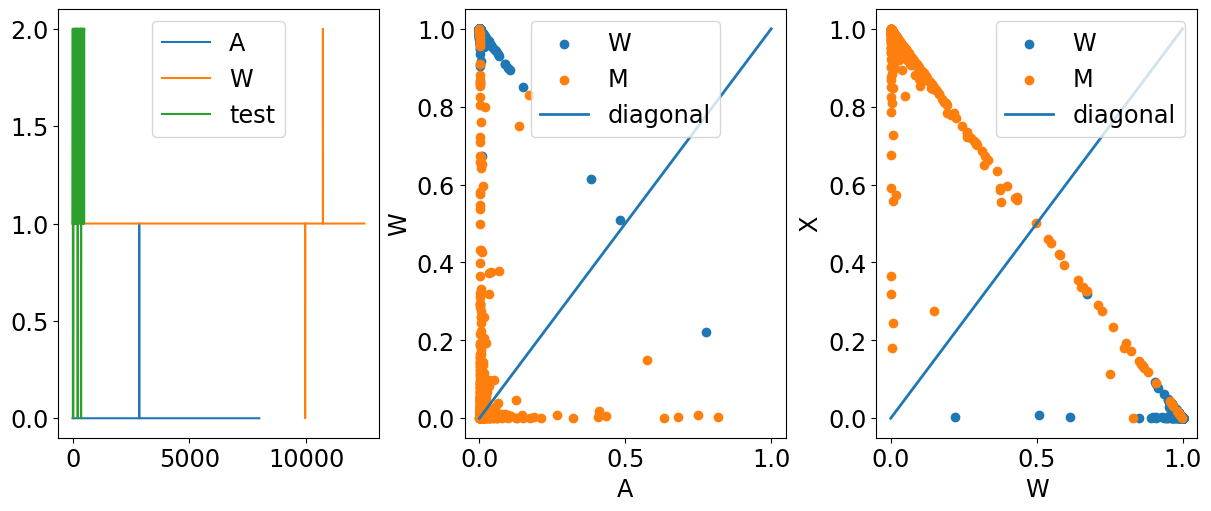

In [10]:
model = keras.saving.load_model("model_A_vs_W.keras")

feature_extractor = keras.Model(
    inputs=model.inputs,
    outputs=[model.layers[-2].output],
)

response_A = np.argmax(model.predict(features_A), axis=1)
response_W =  np.argmax(model.predict(features_W), axis=1)
response_test =  np.argmax(model.predict(features_test), axis=1)

features_2D_A = model.predict(features_A)
features_2D_W = model.predict(features_W)
features_2D_test = model.predict(features_test)

fig, axes = plt.subplots(1,3,layout='constrained', figsize = (12,5))

axes[0].plot(response_A[:], label="A")
axes[0].plot(response_W[:], label="W")
axes[0].plot(response_test[:], label="test")
axes[0].legend();

axes[1].scatter(features_2D_W[:,0], features_2D_W[:,1], label="W")
axes[1].scatter(features_2D_test[:,0], features_2D_test[:,1], label="M")
axes[1].plot([0,1], [0,1], lw=2, label="diagonal")
axes[1].set_xlabel('A')
axes[1].set_ylabel('W')
axes[1].legend();

axes[2].scatter(features_2D_W[:,1], features_2D_W[:,2], label="W")
axes[2].scatter(features_2D_test[:,1], features_2D_test[:,2], label="M")
axes[2].plot([0,1], [0,1], lw=2, label="diagonal")
axes[2].set_xlabel('W')
axes[2].set_ylabel('X')
axes[2].legend();

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


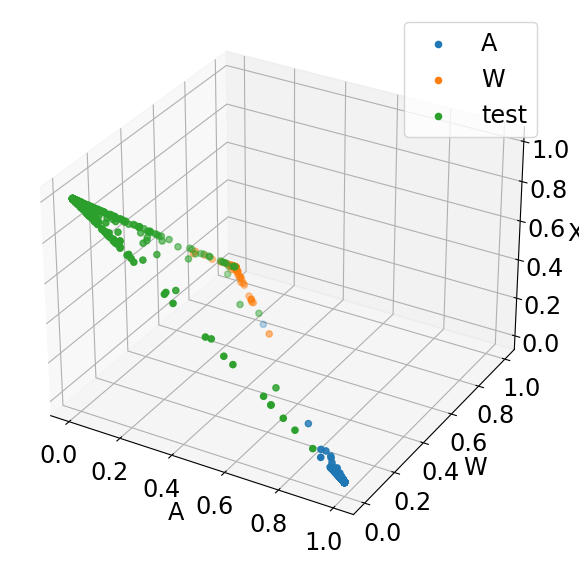

In [167]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
response = model.predict(features_A)
ax.scatter(response[:,0], response[:,1], response[:,2], label = "A")
response = model.predict(features_W)
ax.scatter(response[:,0], response[:,1], response[:,2], label = "W")
response = model.predict(features_test)
ax.scatter(response[:,0], response[:,1], response[:,2], label = "test")
ax.legend()

ax.set_xlabel('A')
ax.set_ylabel('W')
ax.set_zlabel('X');

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/home/akalinow/scratch/venv/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(100, 1280))
  warnings.warn(msg)
/home/akalinow/scratch/venv/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1000, 1280))
  warnings.warn(msg)


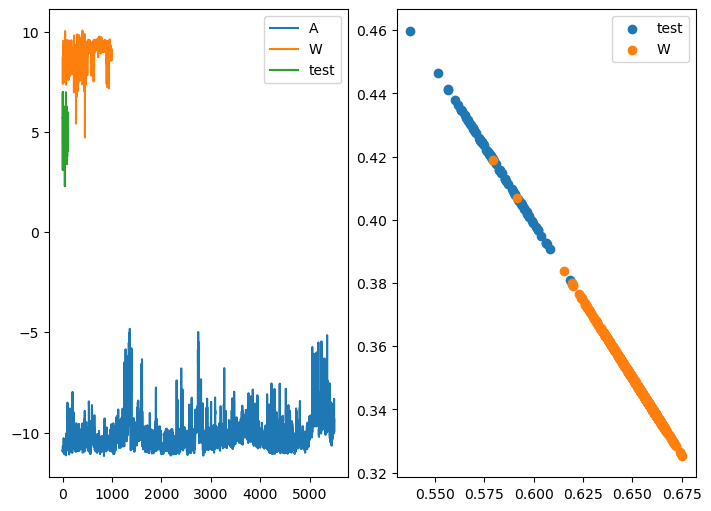

In [8]:
file_path = '/home/akalinow/scratch/RPi/FaceFollow/df.parquet_Marcin.gzip'

df_test = pd.read_parquet(file_path)
df_test.drop(index=0, inplace=True)
features_test = np.asarray(df_test.drop(columns=['date','label']))

model = keras.saving.load_model("model_A_vs_W.keras")

response_A = model.predict(features_A)
response_W = model.predict(features_W)
response_test = model.predict(features_test)

features_2D_test = feature_extractor(features_test)
features_2D_W = feature_extractor(features_W)

fig, axes = plt.subplots(1,2,layout='constrained', figsize = (7,5))

axes[0].plot(response_A, label="A")
axes[0].plot(response_W, label="W")
axes[0].plot(response_test, label="test")
axes[0].legend();

axes[1].scatter(features_2D_test[:,0], features_2D_test[:,1], label="test")
axes[1].scatter(features_2D_W[:,0], features_2D_W[:,1], label="W")
axes[1].legend();